## Is our inference unbiased?

In this notebook, we investigate whether our inference pipelines display a bias. To do that, we run the pipelines $N$ times, drawing uniformly a fiducial value of $H_0 \in [20, 140] \, \rm{km} \, \rm{s}^{-1} \, \rm{Mpc}^{-1}$.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from catalog.utils import GalaxyCatalog
from inference.pp_analysis import (
    plot_cumulative, 
    plot_sigma, 
    pp_analysis_specz,
    pp_analysis_photoz,
    save_data
)

In [32]:
# Notebook settings
verbose = True
save_figures = True
figures_prefix = 'figures/pp_analysis/'

In [33]:
n_H0 = 200
n_sim = 100
H0_array = np.linspace(20., 140., n_H0)
c_values = [0.1, 0.2, 0.3]

# Galaxy and GW parameters
n_gw = 200
n_z = 2000
z_max = 1.4
n_dir = 5
n_min = 100
n_gw_per_dir = 40
alpha = np.radians(2)

filename = "./catalog/output.hdf5"
catalog = GalaxyCatalog(filename)

In [34]:
# Draw galaxy redshifts and masses in n_dir directions, with at least n_min per direction
drawn_galaxies = catalog.draw_galaxies(n_dir, alpha, n_min)
z_gal = [catalog.z[galaxies_at_direction] for galaxies_at_direction in drawn_galaxies]
mass_gal = [catalog.mass[galaxies_at_direction] for galaxies_at_direction in drawn_galaxies]
z_min = min([np.min(z_gal_i) for z_gal_i in z_gal])
z = np.linspace(z_min, z_max, n_z)
ci_arr = np.linspace(0., 0.99, 1000)

output_data_filename = "data/pp_analysis.hdf5"

For each drawn value of fiducial $H_0$, we collect the minimal symmetric credible interval (CI) within which it lies. We then plot a cumulative histogram: for each percentile $\alpha$, the corresponding fraction of the $N$ inference runs for which the true $H_0$ lied within the $\alpha$-CI.

In [35]:
specz_inference_data = {'weighted':[],'not_weighted':[]}
for c in c_values:
    data, counts, bins = pp_analysis_specz(n_sim, H0_array, c, z_gal, n_gw_per_dir, event_weights=mass_gal, desc=f"specz-not_weighted_c_{c}")
    specz_inference_data['not_weighted'].append((counts, bins))
    save_data(filename=output_data_filename, dataset=f"specz/not_weighted_c_{c}", data=data)

    data, counts, bins = pp_analysis_specz(n_sim, H0_array, c, z_gal, n_gw_per_dir, event_weights=mass_gal, inference_weights=mass_gal, desc=f"specz-weighted_c_{c}")
    specz_inference_data['weighted'].append((counts, bins))
    save_data(filename=output_data_filename, dataset=f"specz/weighted_c_{c}", data=data)

specz-not_weighted_c_0.1:   0%|          | 0/100 [00:00<?, ?it/s]

specz-weighted_c_0.3: 100%|██████████| 100/100 [10:16<00:00,  6.16s/it]


In [36]:
def plot_pp(data, filename):
    fig, ax = plt.subplots()
    for (counts, bins), c in zip(data, c_values):
        plot_cumulative(ax, counts, bins, label=f"C = {c}")

    plot_sigma(ax, n_sim, ci_arr)
    ax.set_xlabel("Credible interval (CI)")
    ax.set_ylabel("Fraction of runs in CI")
    ax.grid()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.legend(loc=2)
    fig.tight_layout()
    if save_figures:
        fig.savefig(figures_prefix + filename + '.png', dpi=400)
    plt.show()

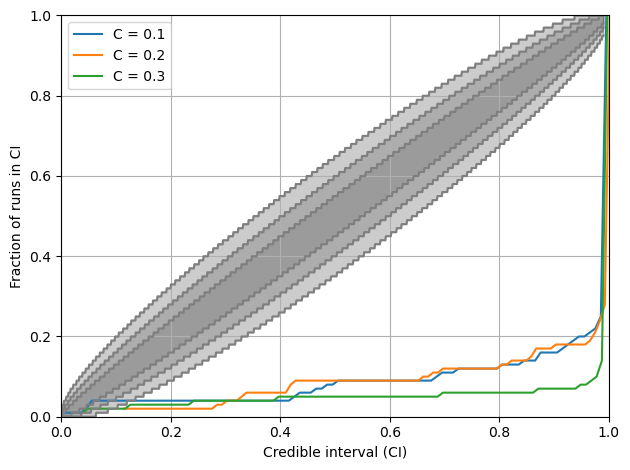

In [37]:
plot_pp(specz_inference_data.get('not_weighted'), 'specz_inference-not_weighted')

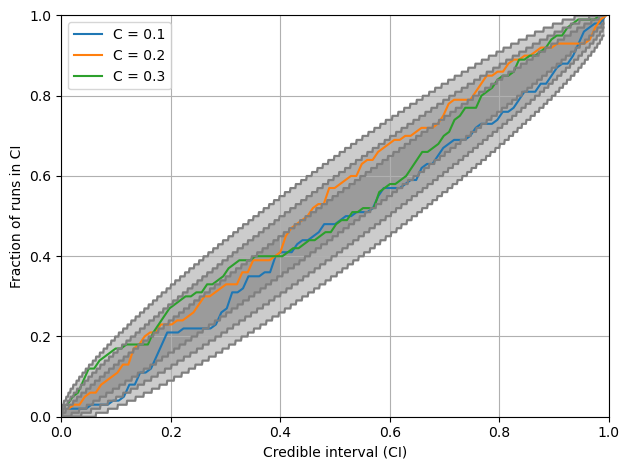

In [38]:
plot_pp(specz_inference_data.get('weighted'), 'specz_inference-weighted')

In [39]:
photoz_inference_data = {'weighted':[],'not_weighted':[]}
for c in c_values:
    data, counts, bins = pp_analysis_photoz(n_sim, H0_array, c, z, z_gal, n_gw_per_dir, event_weights=mass_gal, desc=f"photoz-not_weighted_c_{c}")
    photoz_inference_data['not_weighted'].append((counts, bins))
    save_data(filename=output_data_filename, dataset=f"photoz/not_weighted_c_{c}", data=data)

    data, counts, bins = pp_analysis_photoz(n_sim, H0_array, c, z, z_gal, n_gw_per_dir, event_weights=mass_gal, inference_weights=mass_gal, desc=f"photo-weighted_c_{c}")
    photoz_inference_data['weighted'].append((counts, bins))
    save_data(filename=output_data_filename, dataset=f"photoz/weighted_c_{c}", data=data)

photo-weighted_c_0.3: 100%|██████████| 100/100 [16:06<00:00,  9.67s/it]


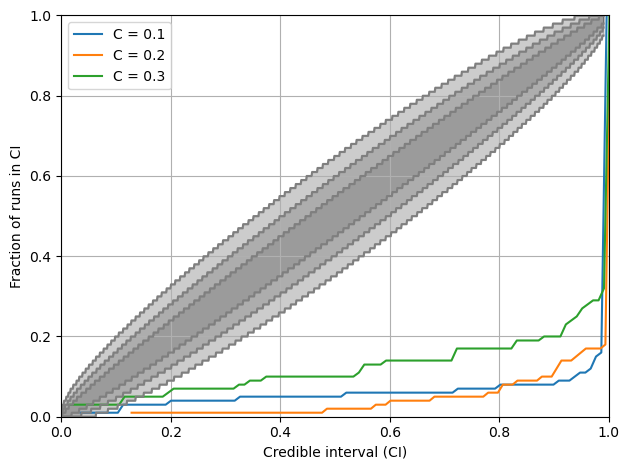

In [40]:
plot_pp(photoz_inference_data.get('not_weighted'), 'photoz_inference-not_weighted')

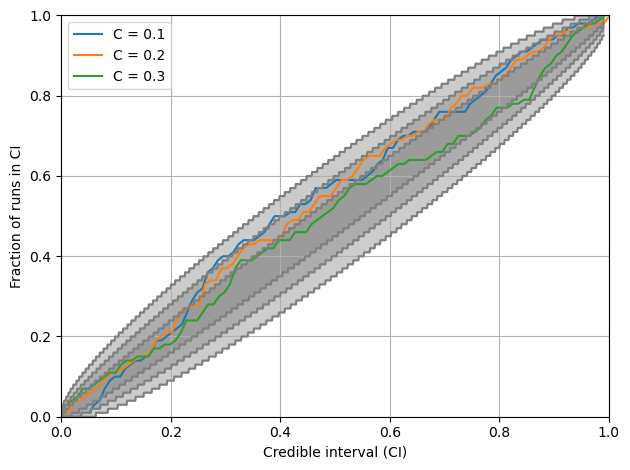

In [41]:
plot_pp(photoz_inference_data.get('weighted'), 'photoz_inference-weighted')